<h2> Equipo: </h2>

<table>
    <tr>
        <td>Nombre</td>
        <td>Programa Educativo</td>
        <td>Semestre</td>
        <td>Matrícula</td>
    </tr>
    <tr>
        <td>Edna Cruz Flores</td>
        <td>Maestría en Optimización y Cómputo Aplicado</td>
        <td>Tercer semestre</td>
        <td>10034119</td>
    </tr>
    <tr>
        <td>Alejandro Carvantes Barrera</td>
        <td>Maestría en Optimización y Cómputo Aplicado</td>
        <td>Primer semestre</td>
        <td>10036987</td>
    </tr>
    <tr>
        <td>Ollin Villalon Villarreal</td>
        <td>Licenciatura en Ciencias Computacionales</td>
        <td>Tercer semestre</td>
        <td>10032484</td>
    </tr>
</table>

<h3> Link de github: </h3>

<a href="https://github.com/Edna-Cruz-Fl/IA-UAEM/blob/main/PokemonModels/"> Edna Cruz Flores || Pokemon Models [Path_Pokemon[ECF-MOCA].ipynb] </a>

# EDA Pokemon y algo más...

---

### Importando librerías

In [ ]:
# Data manipulation libraries
import numpy as np 
import pandas as pd 
import io

# Data visualisation 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Web scraping 
from bs4 import BeautifulSoup, Comment
from requests import get


#pokemon = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/data/Pokemon.csv')

In [ ]:
## Reading the data
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [ ]:
pokemon = pd.read_csv(io.StringIO(uploaded['Pokemon.csv'].decode('utf-8')), delimiter=",",quoting=3)

# Análisis 1

In [ ]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
!pip install -U hiplot

     |████████████████████████████████| 747kB 5.9MB/s 
     |████████████████████████████████| 788kB 30.4MB/s 
     |████████████████████████████████| 358kB 23.8MB/s 
     |████████████████████████████████| 358kB 31.8MB/s 
  Created wheel for flask-compress: filename=Flask_Compress-1.8.0-cp36-none-any.whl size=7215 sha256=0ff7e9d4b1bf04a5897b1835e519a433282ca2ca179bc6f9757f369929b4d8a0
  Stored in directory: /root/.cache/pip/wheels/f9/aa/e9/c4b763ea17eb0662124f67924cbfb9ee0efa83e28f6131baec
Successfully built flask-compress
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:


In [ ]:
import hiplot as hip
testhip = hip.Experiment.from_dataframe(pokemon)
testhip.display()

<IPython.core.display.Javascript object>

In [ ]:
poke_url = 'https://pokemondb.net/evolution#evo-g2'
response = get(poke_url) 
html_soup = BeautifulSoup(response.text, 'html.parser') ## Getting the html into python

In [ ]:
infocard = html_soup.find_all('div', {'class' : 'infocard-list-evo'})

In [ ]:
raw = []
for chain in infocard:
    raw.append(([(i, x.find('small').getText(), x.find_all('small')[1].getText(), x.find('a', {'class':'ent-name'}).getText(), ) for i, x in enumerate(list(chain.find_all('span', {'class':'infocard-lg-data text-muted'})), 1)]))

raw[:4] ## Our list contains touple lists with the evolution branch of each pokemon. We keep that in mind for our future processing

[[(1, '#001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#002', 'Grass · Poison', 'Ivysaur'),
  (3, '#003', 'Grass · Poison', 'Venusaur')],
 [(1, '#004', 'Fire', 'Charmander'),
  (2, '#005', 'Fire', 'Charmeleon'),
  (3, '#006', 'Fire · Flying', 'Charizard')],
 [(1, '#007', 'Water', 'Squirtle'),
  (2, '#008', 'Water', 'Wartortle'),
  (3, '#009', 'Water', 'Blastoise')],
 [(1, '#010', 'Bug', 'Caterpie'),
  (2, '#011', 'Bug', 'Metapod'),
  (3, '#012', 'Bug · Flying', 'Butterfree')]]

In [ ]:
#And what better way to do all this than list comprehensions! 
step_1 = [[elem for elem in branch_list if 'Alol' not in elem[2]] for branch_list in raw] ## Remove all touples that contain 'Alol' in the small text (removing the second Raichu in our example)
step_2 = [[elem for elem in branch_list if int(elem[1][1:]) <= 700] for branch_list in step_1] ## Remove all pokemon that are after Gen 2 (Number > 251) 
step_3 = [elem for elem in step_2 if len(elem) > 1] ##Remove entries that have a length of 1 or less (remove leftovers that are not actual branches in Gens 1 & 2)

In [ ]:
has_evolution = [[elem[3] for elem in branch_list] for branch_list in step_3] ## Extract all pokemon that in the raw list
has_evolution = sum(has_evolution, []) ## 'Un-tupple' them -- This is not the optimal way to do this but I find it really really cool and for such a small list it doesn't matter

In [ ]:
last_evolutions  = [x[-1] for x in step_3] ## Take the last entry into each element list
last_evolutions.extend([x[-2] for x in step_3 if x[-1][0] == 4]) # The ones that have 2 end evolutions like Politoed and Poliwrath

## This is the eevee and hitmontop section as they have 5 and 3 final evolutions respecitvely
eevee_and_hitmon = [x[1:] for x in step_3 if (x[0][3] == 'Tyrogue') or (x[0][3] ==  'Eevee')]
eevee_and_hitmon = sum(eevee_and_hitmon, [])
last_evolutions.extend(eevee_and_hitmon)

last_evo_df = pd.DataFrame([[int(x[1][1:]), x[3]] for x in last_evolutions], columns=['Number', 'Pokemon'] )
last_evo_df = last_evo_df.drop_duplicates() ## Remove duplicates because some hitmontop and eevee evolutions have been added more than once in the process

In [ ]:
# Desechar #
pokemon.drop(['#'], axis = 'columns', inplace = True)

# Sólo trabajaremos con la generación 1 y 2 .... vean que en este dataset hay hasta la 6ta gen...
my_pokemon = pokemon[pokemon.Generation.isin([1, 2, 3, 4, 5, 6])].copy()
my_pokemon.Generation.unique()
my_pokemon.shape

(800, 12)

In [ ]:
my_pokemon['Has_evol'] = my_pokemon.Name.isin(has_evolution)
my_pokemon['Last_evol'] = my_pokemon.Name.isin(last_evo_df.Pokemon)
my_evolved_pokemon = my_pokemon.loc[(my_pokemon.Last_evol == True) | (my_pokemon.Has_evol == False)].copy()

In [ ]:
my_evolved_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Has_evol,Last_evol
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,True
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,False,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True,True
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,False,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,False,False
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,False,False
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,False,False
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,False,False


In [ ]:
my_pokemon.Legendary.unique()

array([False,  True])

# Modelos para saber si son o no legendarios

In [ ]:
X = my_evolved_pokemon.drop(columns =['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Has_evol', 'Last_evol'])
y = my_evolved_pokemon['Legendary']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print('Dimensión de matriz X_train: ',X_train.shape)
print('Dimensión de matriz X_test: ',X_test.shape)
print('Dimensión de matriz y_train: ',y_train.shape)
print('Dimensión de matriz y_test: ',y_test.shape)

Dimensión de matriz X_train:  (349, 7)
Dimensión de matriz X_test:  (117, 7)
Dimensión de matriz y_train:  (349,)
Dimensión de matriz y_test:  (117,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf')
alg3 = RF()
alg4 = DT()

In [ ]:
from sklearn.metrics import accuracy_score
alg1.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.893983,0.905983


In [ ]:
alg2.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})


,Accurancy on Train,Accurancy on Test
0,0.885387,0.897436


In [ ]:
alg3.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})


,Accurancy on Train,Accurancy on Test
0,0.994269,0.91453


In [ ]:
alg4.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.994269,0.91453


In [ ]:
test = np.array([[720.0,120.0,120.0,120.0,120.0,120.0,120.0]])

In [ ]:
alg1.predict(test)[0]

True

In [ ]:
alg2.predict(test)[0]

True

In [ ]:
alg3.predict(test)[0]

True

In [ ]:
alg4.predict(test)[0]

True

### Implementando perceptrón

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
# Un perceptrón con las siguientes características y deberán entrenarlo
ppn = Perceptron(eta0=0.001)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.001,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Ahora, debemos hacer la predicción...
y_pred = ppn.predict(X_test)

In [ ]:
y_pred

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False])

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.56


In [ ]:
ppn.predict(test)[0]

False

## Implementado Perceptron multi capa

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(7, 2), random_state=1)

clf.fit(X_train, y_train)
MLPClassifier(alpha=0.0001, hidden_layer_sizes=(7, 2), random_state=1,
              solver='adam')

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
## Predicción
clf.predict(test)[0]

False

### Extender ejercicio para otras categorías usando pokedex_v2

In [ ]:
## Reading the data
from google.colab import files
uploaded = files.upload()

Saving pokedex_v2.csv to pokedex_v2.csv


In [ ]:
pkdx = pd.read_csv(io.StringIO(uploaded['pokedex_v2.csv'].decode('utf-8')), delimiter=",",quoting=3)
pkdx

,pokedex_number,Name,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,generation,status
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Normal
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Normal
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Normal
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Normal
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,Fairy,NaN,670,92,130,115,80,115,138,8,Legendary
1024,889,Zamazenta Crowned Shield,Fighting,Steel,720,92,130,145,80,145,128,8,Legendary
1025,889,Zamazenta Hero of Many Battles,Fighting,NaN,670,92,130,115,80,115,138,8,Legendary
1026,890,Eternatus,Poison,Dragon,690,140,85,95,145,95,130,8,Legendary


In [ ]:
result = pd.merge(pokemon, pkdx, on=['Name'])
result

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,pokedex_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,generation,status
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,Grass,Poison,318,45,49,49,65,65,45,1,Normal
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,Grass,Poison,405,60,62,63,80,80,60,1,Normal
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3,Grass,Poison,525,80,82,83,100,100,80,1,Normal
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,4,Fire,NaN,309,39,52,43,60,50,65,1,Normal
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,5,Fire,NaN,405,58,64,58,80,65,80,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,715,Flying,Dragon,535,85,70,80,97,80,123,6,Normal
700,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True,716,Fairy,NaN,680,126,131,95,131,98,99,6,Legendary
701,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,717,Dark,Flying,680,126,131,95,131,98,99,6,Legendary
702,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,719,Rock,Fairy,600,50,100,150,100,150,50,6,Mythical


In [ ]:
result.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'pokedex_number', 'type_1', 'type_2', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'status'],
      dtype='object')

In [ ]:
X = result[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = result['status']
X

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,309,39,52,43,60,50,65
4,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...
699,535,85,70,80,97,80,123
700,680,126,131,95,131,98,99
701,680,126,131,95,131,98,99
702,600,50,100,150,100,150,50


In [ ]:
y

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
         ...    
699       Normal
700    Legendary
701    Legendary
702     Mythical
703     Mythical
Name: status, Length: 704, dtype: object

In [ ]:
result.groupby('status').generation.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Legendary,13.0,3.769231,1.589227,1.0,3.0,4.0,5.0,6.0
Mythical,11.0,4.000000,1.549193,1.0,3.5,4.0,5.0,6.0
Normal,660.0,3.263636,1.673740,1.0,2.0,3.0,5.0,6.0
Sub Legendary,20.0,3.150000,1.308877,1.0,2.0,3.0,4.0,5.0


Otros puntos de referencia:

* https://www.kaggle.com/nayansolanki2411/world-of-pokemon
* https://www.kaggle.com/rautaki0127/pokemon-data-science-challenge
* https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Esto significa que si la clase mayoritaria tuviera 1000 ejemplos y la clase minoritaria 100, esta estrategia sobremuestrearía la clase minoritaria para que tenga 1000 ejemplos.

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
y_over

array(['Normal', 'Normal', 'Normal', ..., 'Mythical', 'Mythical',
       'Mythical'], dtype=object)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

Por ejemplo, un conjunto de datos con 1000 ejemplos en la clase mayoritaria y 100 ejemplos en la clase minoritaria se submuestreará de modo que ambas clases tengan 100 ejemplos en el conjunto de datos de entrenamiento transformado.


In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
type(undersample)

imblearn.under_sampling._prototype_selection._random_under_sampler.RandomUnderSampler

Luego, la transformación puede ajustarse y aplicarse a un conjunto de datos en un solo paso llamando a la función fit_resample () y pasando el conjunto de datos sin transformar como argumentos.

In [ ]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print('Dimensión matriz con dataset',X_under.shape)
print('Dimensión matriz con etiqueas dataset',y_under.shape)

Dimensión matriz con dataset (55, 7)
Dimensión matriz con etiqueas dataset (55,)


Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considera ejecutar el ejemplo varias veces y compara el resultado promedio.

El modelo elegido y la configuración de remuestreo son arbitrarios, diseñados para proporcionar una plantilla que puede usar para probar el submuestreo con su conjunto de datos y algoritmo de aprendizaje en lugar de resolver de manera óptima el conjunto de datos sintéticos.

# Repetir proceso de entrenamientos y mencionar las diferencias, cosas positivas o negativas.

---

### RandomOverSamples

In [ ]:
## Split del dataset transformado y balanceado
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_over, y_over)

In [ ]:
print('Dimensión de matriz X_trainO: ',X_trainO.shape)
print('Dimensión de matriz X_testO: ',X_testO.shape)
print('Dimensión de matriz y_trainO: ',y_trainO.shape)
print('Dimensión de matriz y_testO: ',y_testO.shape)

Dimensión de matriz X_trainO:  (1014, 7)
Dimensión de matriz X_testO:  (339, 7)
Dimensión de matriz y_trainO:  (1014,)
Dimensión de matriz y_testO:  (339,)


In [ ]:
print('Etiquetas de las clases y_testO para los datos en  X_testO:\n',np.unique(y_testO))
print('\nEtiquetas de las clases y_trainO para los datos en  X_trainO:\n',np.unique(y_trainO))

Etiquetas de las clases y_testO para los datos en  X_testO:
 ['Legendary' 'Mythical' 'Normal' 'Sub Legendary']

Etiquetas de las clases y_trainO para los datos en  X_trainO:
 ['Legendary' 'Mythical' 'Normal' 'Sub Legendary']


In [ ]:
## Definición de algoritmos
algLR_o = LogisticRegression()
algSVC_o = SVC(kernel = 'rbf')
algRF_o = RF()
algDT_o = DT()

In [ ]:
algLR_o.fit(X_trainO, y_trainO) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainO, algLR_o.predict(X_trainO))],
    "Accurancy on Test":[accuracy_score(y_testO, algLR_o.predict(X_testO))]})

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Accurancy on Train,Accurancy on Test
0,0.725838,0.678466


In [ ]:
algSVC_o.fit(X_trainO, y_trainO) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainO, algSVC_o.predict(X_trainO))],
    "Accurancy on Test":[accuracy_score(y_testO, algSVC_o.predict(X_testO))]})

,Accurancy on Train,Accurancy on Test
0,0.919132,0.926254


In [ ]:
algRF_o.fit(X_trainO, y_trainO) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainO, algRF_o.predict(X_trainO))],
    "Accurancy on Test":[accuracy_score(y_testO, algRF_o.predict(X_testO))]})

,Accurancy on Train,Accurancy on Test
0,0.999014,0.988201


In [ ]:
algDT_o.fit(X_trainO, y_trainO) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainO, algDT_o.predict(X_trainO))],
    "Accurancy on Test":[accuracy_score(y_testO, algDT_o.predict(X_testO))]})

,Accurancy on Train,Accurancy on Test
0,0.999014,0.985251


In [ ]:
test = np.array([[720.0,120.0,120.0,120.0,120.0,120.0,120.0]])

In [ ]:
algLR_o.predict(test)[0]

'Mythical'

In [ ]:
algSVC_o.predict(test)[0]

'Mythical'

In [ ]:
algRF_o.predict(test)[0]

'Mythical'

In [ ]:
algDT_o.predict(test)[0]

'Mythical'

#### RandomOverSamples: implementación de perceptron

In [ ]:
# Un perceptrón con las siguientes características y deberán entrenarlo
ppnv1 = Perceptron(eta0=0.001)
ppnv1.fit(X_trainO, y_trainO)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.001,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Ahora, debemos hacer la predicción...
y_predO = ppnv1.predict(X_testO)
y_predO

array(['Normal', 'Normal', 'Normal', 'Mythical', 'Normal', 'Normal',
       'Normal', 'Mythical', 'Normal', 'Mythical', 'Normal', 'Mythical',
       'Normal', 'Normal', 'Normal', 'Mythical', 'Mythical', 'Normal',
       'Normal', 'Normal', 'Mythical', 'Normal', 'Mythical', 'Normal',
       'Mythical', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Mythical', 'Normal', 'Normal', 'Mythical', 'Normal', 'Normal',
       'Mythical', 'Mythical', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Mythical', 'Mythical', 'Normal', 'Normal',
       'Normal', 'Normal', 'Mythical', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Mythical', 'Normal', 'Normal',
       'Mythical', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Mythical', 'Normal', 'Normal', 'Mythical', 'Normal', 'Normal',
       'Normal', 'Mythical', 'Normal', 'Mythical', 'Mythical', 'Normal',
       'Normal', 'Normal', 'Normal', 'Mythical', 'Mythical', 'Normal',
       'Norm

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_testO, y_predO))

Accuracy: 0.57


In [ ]:
ppnv1.predict(test)[0]

'Normal'

RandomOverSamples: implementación de perceptron multi-capa

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 2), random_state=1)

clf.fit(X_trainO, y_trainO)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
## Predicción
clf.predict(test)[0]

'Mythical'

### RandomUnderSamples

In [ ]:
## Split del dataset transformado y balanceado
X_trainU, X_testU, y_trainU, y_testU = train_test_split(X_under, y_under)

In [ ]:
print('Dimensión de matriz X_trainU: ',X_trainU.shape)
print('Dimensión de matriz X_testU: ',X_testU.shape)
print('Dimensión de matriz y_trainU: ',y_trainU.shape)
print('Dimensión de matriz y_testU: ',y_testU.shape)

Dimensión de matriz X_trainU:  (41, 7)
Dimensión de matriz X_testU:  (14, 7)
Dimensión de matriz y_trainU:  (41,)
Dimensión de matriz y_testU:  (14,)


In [ ]:
print('Etiquetas de las clases y_testU para los datos en  X_testU:\n',np.unique(y_testU))
print('\nEtiquetas de las clases y_trainU para los datos en  X_trainU:\n',np.unique(y_trainU))

Etiquetas de las clases y_testU para los datos en  X_testU:
 ['Legendary' 'Mythical' 'Normal' 'Sub Legendary']

Etiquetas de las clases y_trainU para los datos en  X_trainU:
 ['Legendary' 'Mythical' 'Normal' 'Sub Legendary']


In [ ]:
## Definición de algoritmos
algLR = LogisticRegression()
algSVC = SVC(kernel = 'rbf')
algRF = RF()
algDT = DT()

In [ ]:
algLR.fit(X_trainU, y_trainU) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainU, algLR.predict(X_trainU))],
    "Accurancy on Test":[accuracy_score(y_testU, algLR.predict(X_testU))]})

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Accurancy on Train,Accurancy on Test
0,0.463415,0.5


In [ ]:
algSVC.fit(X_trainU, y_trainU) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainU, algLR.predict(X_trainU))],
    "Accurancy on Test":[accuracy_score(y_testU, algSVC.predict(X_testU))]})

,Accurancy on Train,Accurancy on Test
0,0.463415,0.428571


In [ ]:
algRF.fit(X_trainU, y_trainU) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainU, algLR.predict(X_trainU))],
    "Accurancy on Test":[accuracy_score(y_testU, algRF.predict(X_testU))]})

,Accurancy on Train,Accurancy on Test
0,0.463415,0.714286


In [ ]:
algDT.fit(X_trainU, y_trainU) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_trainU, algLR.predict(X_trainU))],
    "Accurancy on Test":[accuracy_score(y_testU, algDT.predict(X_testU))]})

,Accurancy on Train,Accurancy on Test
0,0.463415,0.785714


In [ ]:
test = np.array([[720.0,120.0,120.0,120.0,120.0,120.0,120.0]])

In [ ]:
algLR.predict(test)[0]

'Sub Legendary'

In [ ]:
algSVC.predict(test)[0]

'Legendary'

In [ ]:
algRF.predict(test)[0]

'Mythical'

In [ ]:
algDT.predict(test)[0]

'Mythical'

#### RandomUnderSamples: Implementación del perceptron con el segundo dataset

In [ ]:
# Un perceptrón con las siguientes características y deberán entrenarlo
ppnv2 = Perceptron(eta0=0.001)
ppnv2.fit(X_trainU, y_trainU)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.001,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Ahora, debemos hacer la predicción...
y_predU = ppnv2.predict(X_testU)

In [ ]:
y_predU

array(['Legendary', 'Legendary', 'Legendary', 'Legendary', 'Legendary',
       'Legendary', 'Legendary', 'Legendary', 'Legendary', 'Legendary',
       'Legendary', 'Legendary', 'Legendary', 'Legendary'], dtype='<U13')

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_testU, y_predU))

Accuracy: 0.21


In [ ]:
ppnv2.predict(test)[0]

'Legendary'

RandomUnderSamples: implementación de perceptron multi capa

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 2), random_state=1)

clf.fit(X_trainO, y_trainO)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf.predict(test)[0]

'Mythical'

## Conclusiones de RandomOverSamples y RandomUnderSamples con los algoritmos LR, SVC, RF, DT y Perceptron



*   RandomOverSamples es recomendable cuando se cuenta con un dataset con pocos ejemplos
*   RandomUnderSamples es recomendable usarse cuando se cuenta con un dataset con muchos ejemplos y clases grandes, ya que se enfoca enla clase minoritaria 
*   El dataset de Pokemon cuenta con pocos ejemplos y portal motivo tuvo bajas precisiones en cada uno de los algoritmos implementados
*   Se tuvo mejores resultados con RandomOverSamples, ya que la transformación del dataset se enfocó en la clase mayoritaria
*   En ambos casos el algoritmo que obtuvo mejor precisión fue Ranfom Forest
*   La implementación del los algoritmos perceptron y perceptron multicapa generaron precisiones bajas, la explicación puede ser por las dimensiones del dataset ya que las características son diferentes variables y diferentes clases, por lo que no sea suficiente con estas arquitecturas.



**Tipos comunes...**

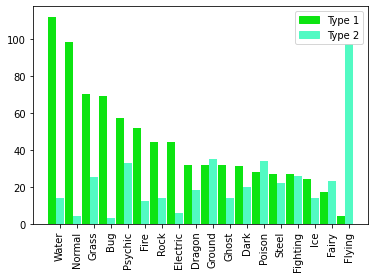

In [ ]:
import matplotlib.patches as patches
vals1 = [pokemon['Type 1'].value_counts()[key] for key in pokemon['Type 1'].value_counts().index]
vals2 = [pokemon['Type 2'].value_counts()[key] for key in pokemon['Type 1'].value_counts().index]
inds = np.arange(len(pokemon['Type 1'].value_counts().index))
width = .45
color1 = np.random.rand(3)
color2 = np.random.rand(3)
handles = [patches.Patch(color=color1, label='Type 1'), patches.Patch(color=color2, label='Type 2')]
plt.bar(inds, vals1, width, color=color1)
plt.bar(inds+width, vals2, width, color=color2)
plt.gca().set_xticklabels(pokemon['Type 1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)

In [ ]:
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

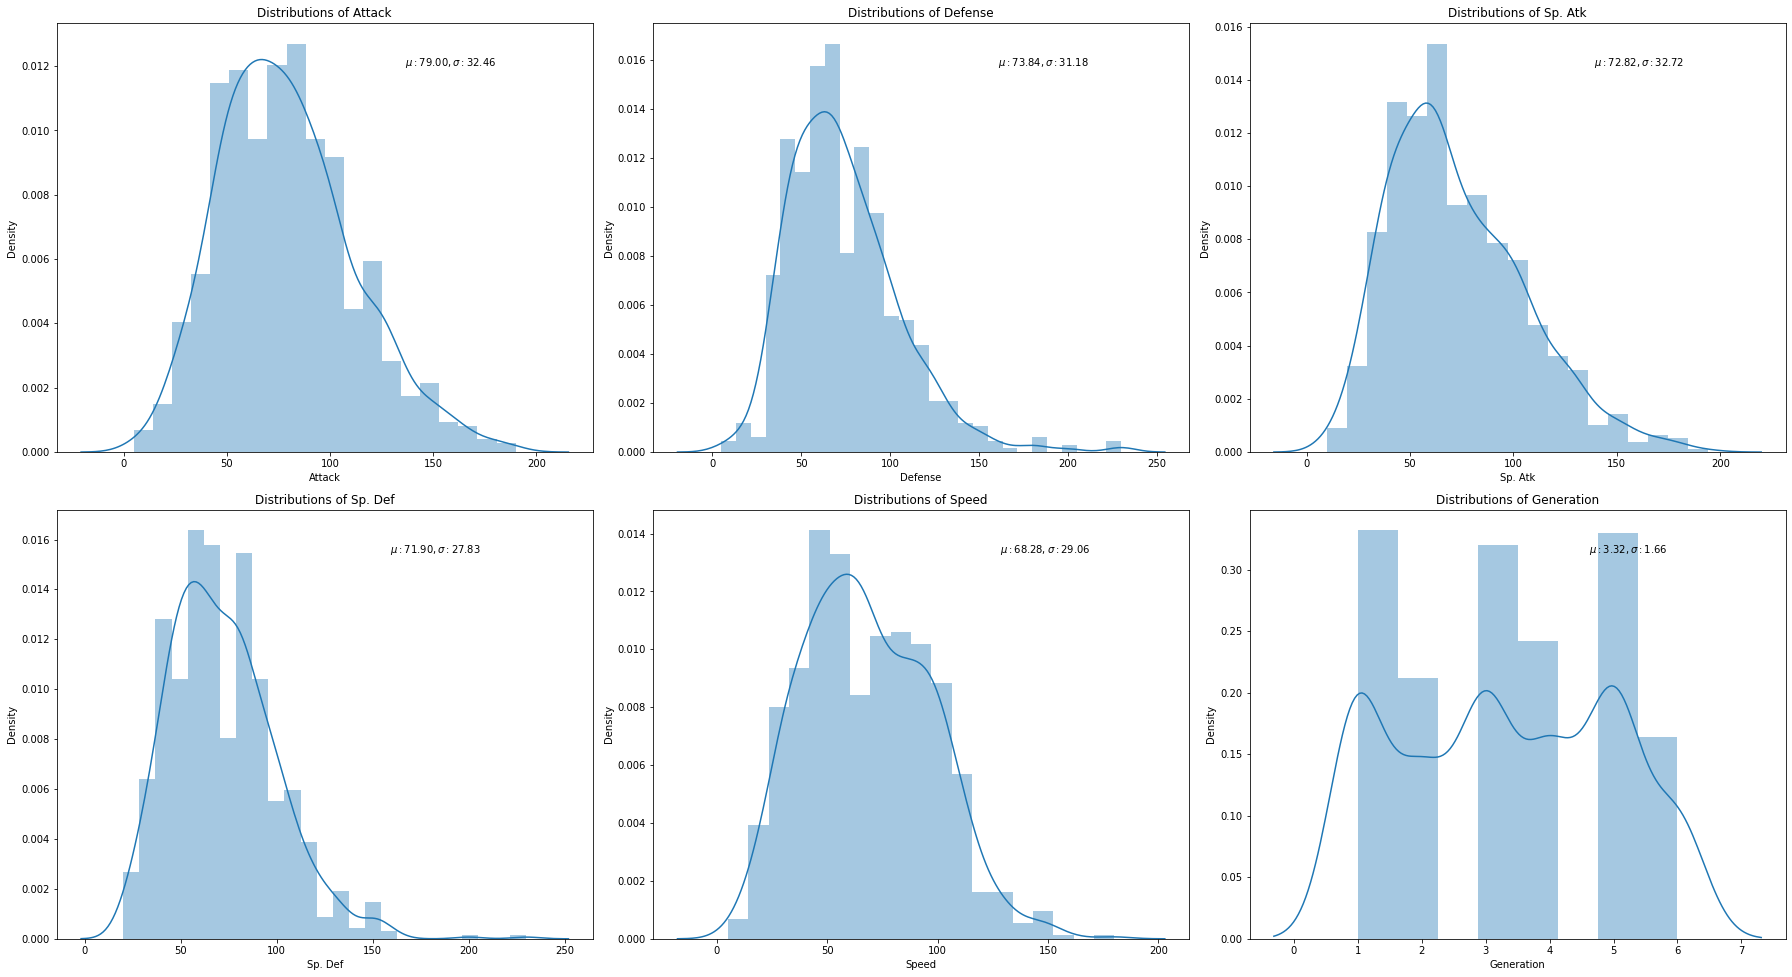

In [ ]:
stats = pokemon.columns[5:11]
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    title = "Distributions of {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.distplot(pokemon[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = pokemon[stat].mean(), sigma=pokemon[stat].std()))
    
    
plt.tight_layout()
plt.show()

Comparación entre tipos

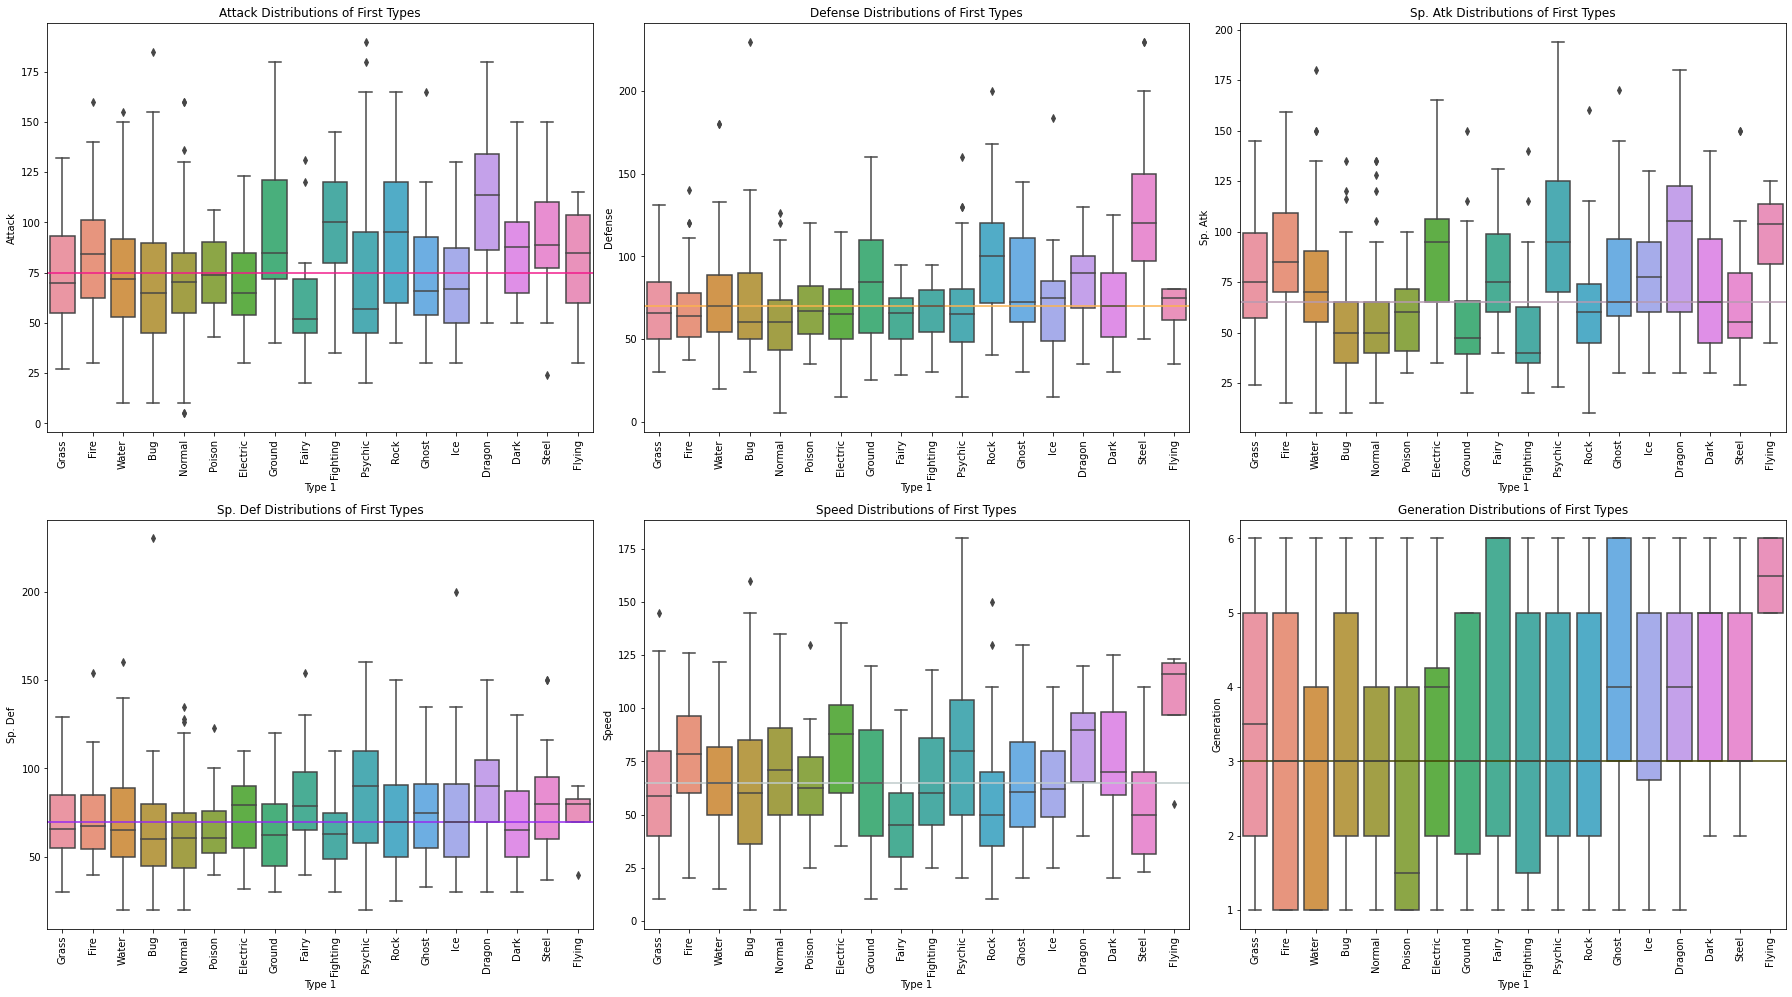

In [ ]:
plt.figure(figsize=(25,20))

for ii, stat in enumerate(stats):
    title = "{stat} Distributions of First Types".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='Type 1', y=stat, data = pokemon)
    plt.axhline(pokemon[stat].median(), color=np.random.rand(3))
    
plt.tight_layout()
plt.show()

### CNN

In [ ]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import requests

from PIL import Image
from io import BytesIO

from collections import Counter
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

warnings.filterwarnings('ignore')

In [ ]:
!ls

pokedex_v2.csv	Pokemon.csv  sample_data


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Datasets/data/datasetpk' # Path to directory which contains classes

classes = os.listdir(path) # List of all classes
print(f'Total number of categories: {len(classes)}')

# A dictionary which contains class and number of images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [ ]:
# Sort our "counts" dictionary and selecting 5 classes with most number of images
imbalanced = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:5]
print(imbalanced)

# Taking only labels, it will come in handy in future
imbalanced = [i[0] for i in imbalanced]
print(imbalanced)

In [ ]:
X = [] # List for images
Y = [] # List for labels

# Loop through all classes
for c in classes:
    # We take only classes that we defined in 'imbalanced' list
    if c in imbalanced:
        dir_path = os.path.join(path, c)
        label = imbalanced.index(c) # Our label is an index of class in 'imbalanced' list
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            try:
                resized = cv.resize(image, (96, 96)) # Resizing images to (96, 96)
                X.append(resized)
                Y.append(label)
            
            # If we can't read image - we skip it
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue       
            
print('DONE')

In [ ]:
# Counting appearances of each label in labels list
obj = Counter(Y)

# Plotting number of images in each class
fig = plt.figure(figsize = (15, 5))
sns.barplot(x = [imbalanced[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images in each class')
plt.margins(x=0)
plt.show()

In [ ]:
# Convert list with images to numpy array and reshape it 
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(imbalanced))

# Splitting data to train and test datasets
# I'll use these datasets only for training, for final predictions I'll use random pictures from internet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

In [ ]:
# Defining ImageDataGenerator Iinstance
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(imbalanced), activation = 'softmax'))

# model.summary()

checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Datasets/data/result/best_model.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 100, validation_data = (X_test, y_test),
                             steps_per_epoch=len(X_train) // 32, callbacks = [checkpoint])

In [ ]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [ ]:
# Loading weights from best model
model.load_weights('/content/drive/My Drive/Colab Notebooks/Datasets/data/result/best_model.hdf5')

# Saving all model
model.save('/content/drive/My Drive/Colab Notebooks/Datasets/data/result/model.hdf5')

In [ ]:
mewtwo = ['https://cdn.bulbagarden.net/upload/thumb/7/78/150Mewtwo.png/250px-150Mewtwo.png',
         'https://cdn.vox-cdn.com/thumbor/sZPPvUyKyF97UEU-nNtVnC3LpF8=/0x0:1750x941/1200x800/filters:focal(878x316:1158x596)/cdn.vox-cdn.com/uploads/chorus_image/image/63823444/original.0.jpg',
         'https://images-na.ssl-images-amazon.com/images/I/61j5ozFjJ0L._SL1024_.jpg']

pikachu = ['https://lh3.googleusercontent.com/proxy/DrjDlKlu9YonKbj3iNCJNJ3DGqzy9GjeXXSUv-TcVV4UN9PMCAM5yIkGLPG7wYo3UeA4sq5OmUWM8M6K5hy2KOAhf8SOL3zPH3axb2Xo3HX2XTU8M2xW4X6lVg=w720-h405-rw',
          'https://giantbomb1.cbsistatic.com/uploads/scale_medium/0/6087/2437349-pikachu.png',
          'https://johnlewis.scene7.com/is/image/JohnLewis/237525467']

charmander = ['https://img.pokemondb.net/artwork/large/charmander.jpg',
             'https://www.pokemoncenter.com/wcsstore/PokemonCatalogAssetStore/images/catalog/products/P5073/701-03990/P5073_701-03990_01.jpg',
             'https://static.posters.cz/image/750/%D0%A7%D0%B0%D1%88%D0%BA%D0%B0/pokemon-charmander-glow-i72513.jpg']

bulbasaur = ['https://img.pokemondb.net/artwork/large/bulbasaur.jpg',
            'https://ae01.alicdn.com/kf/HTB1aWullxSYBuNjSsphq6zGvVXaR/Big-Size-55-CM-Plush-Toy-Squirtle-Bulbasaur-Charmander-Toy-Sleeping-Pillow-Doll-For-Kid-Birthday.jpg',
            'https://cdn.bulbagarden.net/upload/thumb/f/f7/Bulbasaur_Detective_Pikachu.jpg/250px-Bulbasaur_Detective_Pikachu.jpg']

squirtle = ['https://assets.pokemon.com/assets/cms2/img/pokedex/full/007.png',
           'https://cdn.vox-cdn.com/thumbor/l4cKX7ZWargjs-zlxOSW2WZVgfI=/0x0:2040x1360/1200x800/filters:focal(857x517:1183x843)/cdn.vox-cdn.com/uploads/chorus_image/image/61498573/jbareham_180925_ply0802_0030.1537570476.jpg',
           'https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fdavidthier%2Ffiles%2F2018%2F07%2FSquirtle_Squad.jpg']

test_df = [mewtwo, pikachu, charmander, bulbasaur, squirtle]

In [ ]:
import requests
# Lists to store our future data
val_x = []
val_y = []

for i, urls in enumerate(test_df):
    for url in urls:        
        r = requests.get(url, stream = True).raw
        image = np.asarray(bytearray(r.read()), dtype="uint8")
        image = cv.imdecode(image, cv.IMREAD_COLOR)
        val_x.append(image)
        val_y.append(i)

# plt.imshow(image[:, :, ::-1])

In [ ]:
rows = 5
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image
    
    image = cv.resize(orig, (96, 96)) # Resizing image to (96, 96)
    image = image.reshape(-1, 96, 96, 3) / 255.0 # Reshape and scale resized image
    preds = model.predict(image) # Predicting image
    pred_class = np.argmax(preds) # Defining predicted class
    
    true_label = f'True class: {imbalanced[label]}'
    pred_label = f'Predicted: {imbalanced[pred_class]} {round(preds[0][pred_class] * 100, 2)}%'
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
#Intento fallido......

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Datasets/data/dataset/PokemonTrainData' # Path to directory which contains classes

classes = os.listdir(path) # List of all classes
print(f'Total number of categories: {len(classes)}')

# A dictionary which contains class and number of images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [ ]:
# Sort our "counts" dictionary and selecting 5 classes with most number of images
imbalanced = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:5]
print(imbalanced)

# Taking only labels, it will come in handy in future
imbalanced = [i[0] for i in imbalanced]
print(imbalanced)

In [ ]:
X = [] # List for images
Y = [] # List for labels

# Loop through all classes
for c in classes:
    # We take only classes that we defined in 'imbalanced' list
    if c in imbalanced:
        dir_path = os.path.join(path, c)
        label = imbalanced.index(c) # Our label is an index of class in 'imbalanced' list
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            try:
                resized = cv.resize(image, (96, 96)) # Resizing images to (96, 96)
                X.append(resized)
                Y.append(label)
            
            # If we can't read image - we skip it
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue       
            
print('DONE')

In [ ]:
# Counting appearances of each label in labels list
obj = Counter(Y)

# Plotting number of images in each class
fig = plt.figure(figsize = (15, 5))
sns.barplot(x = [imbalanced[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images in each class')
plt.margins(x=0)
plt.show()

In [ ]:
# Convert list with images to numpy array and reshape it 
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(imbalanced))

# Splitting data to train and test datasets
# I'll use these datasets only for training, for final predictions I'll use random pictures from internet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

In [ ]:
# Defining ImageDataGenerator Iinstance
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(imbalanced), activation = 'softmax'))

# model.summary()

checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Datasets/data/result/best_modeltest.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 100, validation_data = (X_test, y_test),
                             steps_per_epoch=len(X_train) // 32, callbacks = [checkpoint])

In [ ]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [ ]:
# Loading weights from best model
model.load_weights('/content/drive/My Drive/Colab Notebooks/Datasets/data/result/best_modeltest.hdf5')

# Saving all model
model.save('/content/drive/My Drive/Colab Notebooks/Datasets/data/result/modeltest.hdf5')

In [ ]:
rows = 5
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image
    
    image = cv.resize(orig, (96, 96)) # Resizing image to (96, 96)
    image = image.reshape(-1, 96, 96, 3) / 255.0 # Reshape and scale resized image
    preds = model.predict(image) # Predicting image
    pred_class = np.argmax(preds) # Defining predicted class
    
    true_label = f'True class: {imbalanced[label]}'
    pred_label = f'Predicted: {imbalanced[pred_class]} {round(preds[0][pred_class] * 100, 2)}%'
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')
    
plt.tight_layout()